In [77]:
import numpy as np
import pandas as pd
import IPython.display 
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

In [39]:
pg = wb.DataReader('PG', data_source = 'yahoo', start = '1995-1-1', end = '2017-3-23')

In [51]:
# Simple returns

pg['simple_return'] = (pg['Adj Close'] / pg['Adj Close'].shift(1))-1
print (pg['simple_return'])

Date
1995-01-03         NaN
1995-01-04   -0.008016
1995-01-05   -0.014141
1995-01-06    0.002049
1995-01-09   -0.004089
                ...   
2017-03-17   -0.004812
2017-03-20    0.002418
2017-03-21   -0.000329
2017-03-22   -0.002193
2017-03-23   -0.002418
Name: simple_return, Length: 5596, dtype: float64


Populating the interactive namespace from numpy and matplotlib


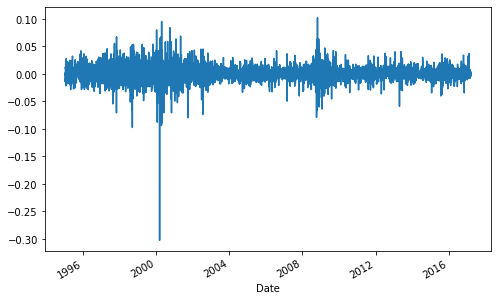

In [58]:
%pylab inline
pg['simple_return'].plot(figsize=(8,5))
plt.show()

In [59]:
avg_returns_d = pg['simple_return'].mean()
avg_returns_d

0.000513834800751248

In [62]:
#Excluding holidays 

avg_returns_a = pg['simple_return'].mean() * 250
avg_returns_a

0.128458700187812

In [68]:
print(str(round(avg_returns_a, 4) * 100) + '%')

12.85%


In [70]:
# Logarithmic returns

pg['log_return'] = np.log(pg['Adj Close'] / pg['Adj Close'].shift(1))
print(pg['log_return'])

Date
1995-01-03         NaN
1995-01-04   -0.008048
1995-01-05   -0.014242
1995-01-06    0.002047
1995-01-09   -0.004098
                ...   
2017-03-17   -0.004824
2017-03-20    0.002415
2017-03-21   -0.000329
2017-03-22   -0.002196
2017-03-23   -0.002421
Name: log_return, Length: 5596, dtype: float64


Populating the interactive namespace from numpy and matplotlib


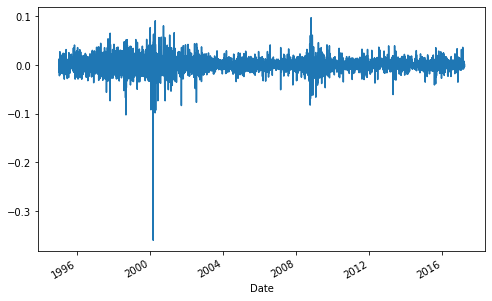

In [71]:
%pylab inline
pg['log_return'].plot(figsize=(8,5))
plt.show()

In [72]:
log_return_d = pg['log_return'].mean()
log_return_d

0.000409758376533781

In [74]:
log_return_a = pg['log_return'].mean() * 250
log_return_a

0.10243959413344525

In [76]:
print(str(round(log_return_a, 4)* 100) + '%') 

10.24%


In [79]:
# For each ticker ("t"), pull data from Yahoo between 1/1/1995 and 3/23/2017.

tickers = ['PG', 'MSFT', 'F', 'GE']
mydata = pd.DataFrame()
for t in tickers:
    mydata[t] = wb.DataReader(t, data_source = 'yahoo', start = '1995-1-1', end = '2017-3-23')['Adj Close']

In [80]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5596 entries, 1995-01-03 to 2017-03-23
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PG      5596 non-null   float64
 1   MSFT    5596 non-null   float64
 2   F       5596 non-null   float64
 3   GE      5596 non-null   float64
dtypes: float64(4)
memory usage: 218.6 KB


In [81]:
mydata.head()

,PG,MSFT,F,GE
Date,,,,
1995-01-03,8.215732,2.401030,3.262354,2.720648
1995-01-04,8.149876,2.418484,3.350130,2.720648
1995-01-05,8.034625,2.378592,3.320871,2.727315
1995-01-06,8.051086,2.418484,3.320871,2.713979
1995-01-09,8.018162,2.403525,3.379390,2.687307


In [82]:
mydata.tail()

,PG,MSFT,F,GE
Date,,,,
2017-03-17,81.546997,61.349205,10.466510,26.544071
2017-03-20,81.744156,61.405937,10.298778,26.419703
2017-03-21,81.717262,60.725029,9.829128,26.108780
2017-03-22,81.538048,61.500519,9.871060,26.233147
2017-03-23,81.340897,61.349205,9.787194,26.313099


In [83]:
# Normalize data

# Extract data from the first column of the table (mydata).

mydata.iloc[0]

PG      8.215732
MSFT    2.401030
F       3.262354
GE      2.720648
Name: 1995-01-03 00:00:00, dtype: float64

Populating the interactive namespace from numpy and matplotlib


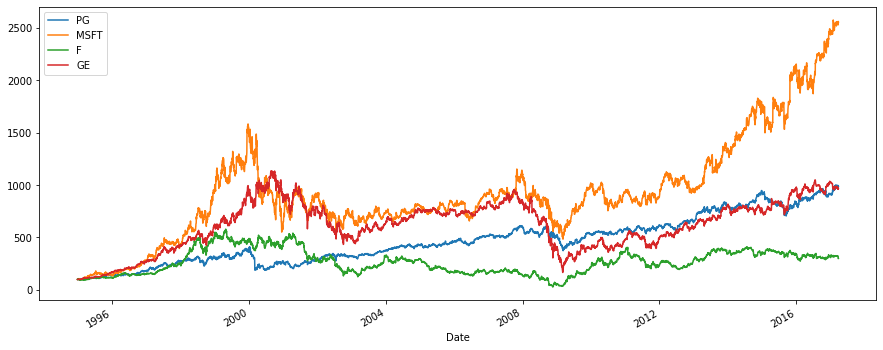

In [84]:
# Plot shows each stock's performance as if they all began from a starting price of $100.

%pylab inline
(mydata / mydata.iloc[0] * 100).plot(figsize = (15,6));
plt.show()

Populating the interactive namespace from numpy and matplotlib


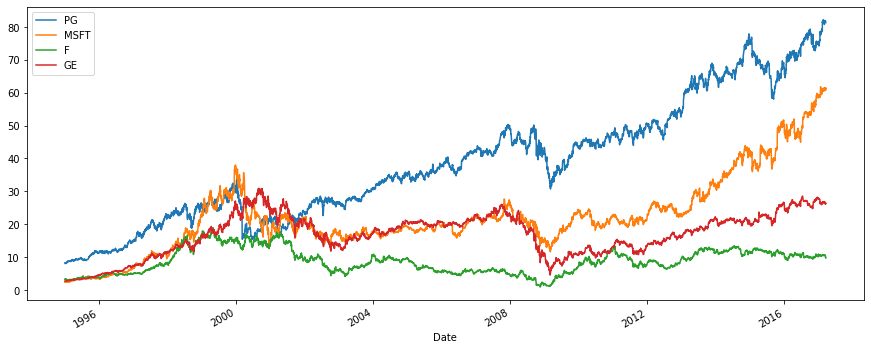

In [85]:
# Plot not normalized to $100.

%pylab inline
mydata.plot(figsize = (15, 6))
plt.show()

In [86]:
# Calculating a portfolio's rate of return

returns = (mydata / mydata.shift(1)) - 1
returns.head()

,PG,MSFT,F,GE
Date,,,,
1995-01-03,NaN,NaN,NaN,NaN
1995-01-04,-0.008016,0.007269,0.026906,0.000000
1995-01-05,-0.014141,-0.016495,-0.008734,0.002450
1995-01-06,0.002049,0.016771,0.000000,-0.004890
1995-01-09,-0.004089,-0.006186,0.017622,-0.009828


In [89]:
weights = np.array([0.25, 0.25, 0.25, 0.25])

In [90]:
np.dot(returns, weights)

array([        nan,  0.0065398 , -0.00922985, ..., -0.01719716,
        0.00490173, -0.00258167])

In [91]:
annual_returns = returns.mean() * 250
annual_returns

PG      0.128459
MSFT    0.195885
F       0.131523
GE      0.144660
dtype: float64

In [92]:
np.dot(annual_returns, weights)

0.150131708440289

In [96]:
pfolio_1 = str(round(np.dot(annual_returns, weights), 4) * 100) + '%'
print(pfolio_1)

15.010000000000002%


In [97]:
weights_2 = np.array([0.4, 0.4, 0.15, 0.05])
pfolio_2 = str(round(np.dot(annual_returns, weights_2), 4) * 100) + '%'
print (pfolio_2)

15.67%


In [111]:
# Market Indices

market_tickers = ['^GSPC', '^IXIC', '^GDAXI', '^DJI']
ind_data = pd.DataFrame()

for t in market_tickers:
    ind_data[t] = wb.DataReader(t, data_source = 'yahoo', start = '1997-1-1', end='2017-3-23')['Adj Close']

In [112]:
ind_data.head()

,^GSPC,^IXIC,^GDAXI,^DJI
Date,,,,
1997-01-02,737.010010,1280.699951,2820.810059,6442.490234
1997-01-03,748.030029,1310.680054,2863.260010,6544.089844
1997-01-06,747.650024,1316.400024,2890.199951,6567.180176
1997-01-07,753.229980,1327.729980,2876.340088,6600.660156
1997-01-08,748.409973,1320.349976,2904.080078,6549.479980


In [113]:
ind_data.tail()

,^GSPC,^IXIC,^GDAXI,^DJI
Date,,,,
2017-03-17,2378.250000,5901.000000,12095.240234,20914.619141
2017-03-20,2373.469971,5901.529785,12052.900391,20905.859375
2017-03-21,2344.020020,5793.830078,11962.129883,20668.009766
2017-03-22,2348.449951,5821.640137,11904.120117,20661.300781
2017-03-23,2345.959961,5817.689941,12039.679688,20656.580078


Populating the interactive namespace from numpy and matplotlib


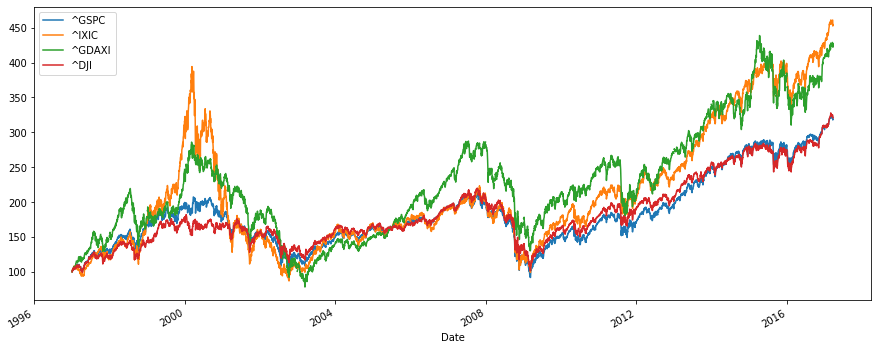

In [114]:
# Normalize indices
%pylab inline
(ind_data / ind_data.iloc[0] * 100).plot(figsize = (15,6));
plt.show()

In [115]:
# Indices simple returns 

ind_returns = (ind_data / ind_data.shift(1)) - 1
ind_returns.tail()

,^GSPC,^IXIC,^GDAXI,^DJI
Date,,,,
2017-03-17,-0.001314,0.000041,0.000998,-0.000952
2017-03-20,-0.002010,0.000090,-0.003501,-0.000419
2017-03-21,-0.012408,-0.018249,-0.007531,-0.011377
2017-03-22,0.001890,0.004800,-0.004849,-0.000325
2017-03-23,-0.001060,-0.000679,0.011388,-0.000228


In [116]:
# Annual returns

annual_ind_returns = ind_returns.mean() * 250
annual_ind_returns

^GSPC     0.075810
^IXIC     0.107043
^GDAXI    0.085128
^DJI      0.074027
dtype: float64

In [117]:
ind_equity_tickers = ['GOOGL', '^GSPC', '^DJI']

data_2 = pd.DataFrame()

for t in ind_equity_tickers:
    data_2[t] = wb.DataReader(t, data_source = 'yahoo', start = '2007-1-1', end = '2017-3-23')['Adj Close']

In [118]:
data_2.tail()

,GOOGL,^GSPC,^DJI
Date,,,
2017-03-17,872.369995,2378.250000,20914.619141
2017-03-20,867.909973,2373.469971,20905.859375
2017-03-21,850.140015,2344.020020,20668.009766
2017-03-22,849.799988,2348.449951,20661.300781
2017-03-23,839.650024,2345.959961,20656.580078


Populating the interactive namespace from numpy and matplotlib


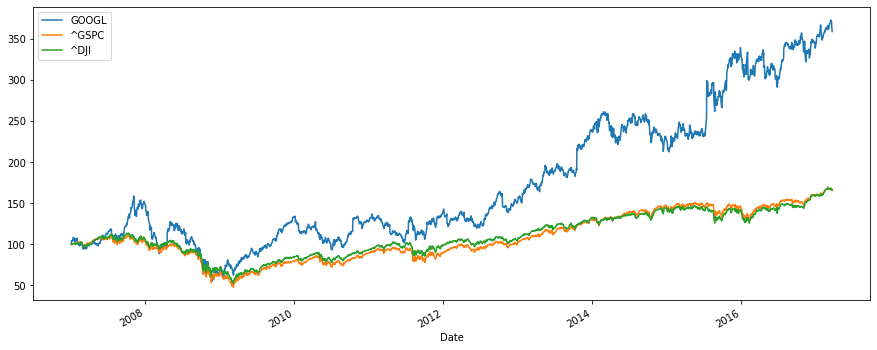

In [119]:
# Normalize GOOGL vs Indices

%pylab inline
(data_2 / data_2.iloc[0] * 100).plot(figsize = (15, 6));
plt.show()

In [123]:
# The Risk of Securities

tickers_2 = ['PG', 'BEI.DE']

sec_data = pd.DataFrame()

for t in tickers_2:
    sec_data[t] = wb.DataReader(t, data_source = 'yahoo', start = '2007-1-1', end = '2017-3-23')['Adj Close']

In [124]:
sec_data.tail()

,PG,BEI.DE
Date,,
2017-03-17,81.547813,85.604782
2017-03-20,81.744972,85.488373
2017-03-21,81.718071,85.255539
2017-03-22,81.538857,85.042107
2017-03-23,81.341698,85.517471


In [125]:
sec_returns = np.log(sec_data / sec_data.shift(1))
sec_returns

,PG,BEI.DE
Date,,
2007-01-03,NaN,NaN
2007-01-04,-0.007621,0.006544
2007-01-05,-0.008624,-0.020772
2007-01-08,0.002203,0.000202
2007-01-09,-0.002517,-0.022858
...,...,...
2017-03-17,-0.004824,0.004430
2017-03-20,0.002415,-0.001361
2017-03-21,-0.000329,-0.002727


In [159]:
# Adding multiple brackets adds multiple dimensions to the array

sec_returns[['PG', 'BEI.DE']].mean() * 250 ** 0.5

PG        0.003969
BEI.DE    0.004114
dtype: float64

In [134]:
sec_returns[['PG', 'BEI.DE']].mean() * 250 

PG        0.062754
BEI.DE    0.065053
dtype: float64

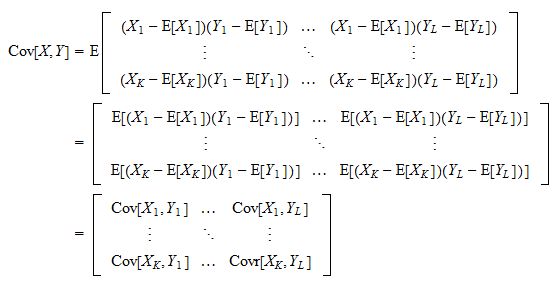

In [135]:
# Covariance Matrix

IPython.display.Image("https://www.statlect.com/images/covariance-matrix__97.png")

In [136]:
PG_var = sec_returns['PG'].var()
PG_var

0.00012458834866695178

In [139]:
BEI_var = sec_returns['BEI.DE'].var()
BEI_var

0.00020325380100299668

In [140]:
PG_var_a = sec_returns['PG'].var() * 250
PG_var_a

0.031147087166737943

In [141]:
BEI_var_a = sec_returns['BEI.DE'].var() * 250
BEI_var_a

0.05081345025074917

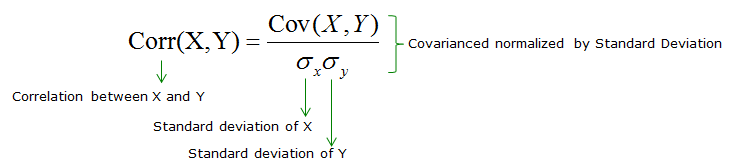

In [155]:
# Correlation and Covariance

IPython.display.Image("https://s3.amazonaws.com/acadgildsite/wordpress_images/Data+Science/Correlation+%2C+Covariance/image8.png")

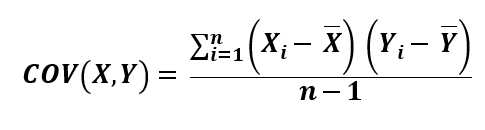

In [157]:
IPython.display.Image("https://education.howthemarketworks.com/wp-content/uploads/2013/09/Covariance.jpg")

In [143]:
cov_matrix = sec_returns.cov()
cov_matrix

,PG,BEI.DE
PG,0.000125,0.000041
BEI.DE,0.000041,0.000203


In [144]:
cov_matrix_a = sec_returns.cov() * 250
cov_matrix_a

,PG,BEI.DE
PG,0.031147,0.010275
BEI.DE,0.010275,0.050813


In [145]:
# Distinction: Correlation between returns, NOT prices

corr_matrix = sec_returns.corr()
corr_matrix

,PG,BEI.DE
PG,1.000000,0.256875
BEI.DE,0.256875,1.000000


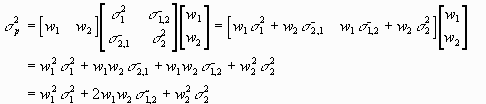

In [146]:
# Portfolio Variance

IPython.display.Image("https://people.duke.edu/~charvey/Classes/ba350_1997/diverse/div17.gif")

In [147]:
# Calculating Risk with equal weights

weights = np.array([0.5, 0.5])

In [148]:
pfolio_var = np.dot(weights.T, np.dot(sec_returns.cov() * 250, weights))
pfolio_var

0.025627502055547688

In [152]:
pfolio_vol = pfolio_var ** 0.5
pfolio_vol

0.16008592085360812

In [154]:
print ("Volatility:", str(round(pfolio_vol, 5) * 100) + '%')
print ("Variance:", str(round(pfolio_var, 5) * 100) + '%')

Volatility: 16.009%
Variance: 2.563%


In [164]:
# Calculating systematic and un-systematic risk
# Where systematic risk is unavoidable (i.e. economic downturns, natural disasters, etc.)
# and un-systematic risk is avoidable (i.e. actions a company takes)

# Diversifiable risk = portfolio variance - weighted annual variances

dr = pfolio_var - (weights[0] ** 2 * PG_var_a) - (weights[1] ** 2 * BEI_var_a)
print(str(round(dr * 100, 3)) + '%')

0.514%


In [165]:
# Non-diversifiable risk = portfolio variance - diversified risk

n_dr_1 = pfolio_var - dr
print(str(round(n_dr_1 * 100, 3)) + '%')

2.049%


In [274]:
housing_indices = pd.read_csv('housing_indices.csv')
housing_indices.head()

,Year and Quarter,Private new house prices,mortgage interest rates,Average earnings of adult workers,House Construction Cost Index,Consumer Prices
0,1990,98,99,99.0,98,98
1,1991,100,95,103.0,102,101
2,1992,103,100,106.0,104,105
3,1993,104,80,111.0,107,106
4,1994,109,60,114.0,110,109


In [231]:
from scipy import stats
import statsmodels.api as sm

y = housing_indices['mortgage interest rates']
x = housing_indices['Consumer Prices']

In [275]:
housing_indices[['mortgage interest rates', 'Consumer Prices']].head()

,mortgage interest rates,Consumer Prices
0,99,98
1,95,101
2,100,105
3,80,106
4,60,109


Populating the interactive namespace from numpy and matplotlib


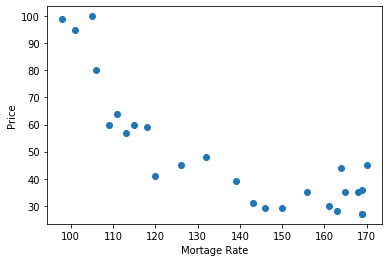

In [234]:
%pylab inline

plt.xlabel('Mortage Rate')
plt.ylabel('Price')
plt.scatter(x,y)

In [235]:
x1 = sm.add_constant(x) # Adds the intercept
reg = sm.OLS(y, x1).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     mortgage interest rates   R-squared:                       0.693
Model:                                 OLS   Adj. R-squared:                  0.680
Method:                      Least Squares   F-statistic:                     54.24
Date:                     Sun, 08 Nov 2020   Prob (F-statistic):           1.32e-07
Time:                             15:58:43   Log-Likelihood:                -102.00
No. Observations:                       26   AIC:                             208.0
Df Residuals:                           24   BIC:                             210.5
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             149.4230     13.842     10.795      0.000     120.855     177.991
Consumer Prices    -0.7270      0.099     -7.365      0.000      -0.931      -0.523
==============================================================================
Omnibus:                        1.706   Durbin-Watson:                   0.586
Prob(Omnibus):                  0.426   Jarque-Bera (JB):                1.535
Skew:                           0.512   Prob(JB):                        0.464
Kurtosis:                       2.394   Cond. No.                         777.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [237]:
# Predict the mortgage rate given the Consumer Price

149.423 - 0.727*(150)

# Jesus christ, these mortgage rates are ridiculously high.

40.373000000000005

In [240]:
# Markowitz
%matplotlib inline

assets = ['PG', '^GSPC']
pf_data = pd.DataFrame()

for a in assets:
    pf_data[a] = wb.DataReader(a, data_source = 'yahoo', start = '2010-1-1', end = '2017-3-24')['Adj Close']

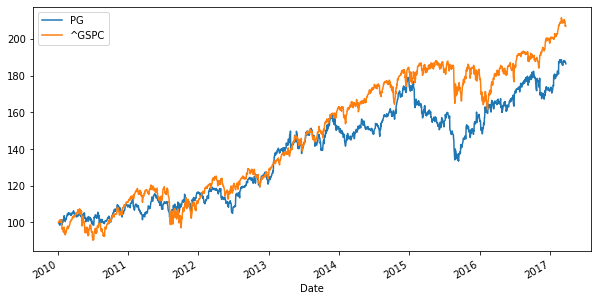

In [242]:
# Normalize and plot

(pf_data / pf_data.iloc[0] * 100).plot(figsize = (10, 5))

In [243]:
log_returns = np.log(pf_data / pf_data.shift(1))
log_returns

,PG,^GSPC
Date,,
2010-01-04,NaN,NaN
2010-01-05,0.000327,0.003111
2010-01-06,-0.004755,0.000545
2010-01-07,-0.005438,0.003993
2010-01-08,-0.001323,0.002878
...,...,...
2017-03-20,0.002415,-0.002012
2017-03-21,-0.000329,-0.012486
2017-03-22,-0.002195,0.001888


In [244]:
log_returns.mean() * 250

PG       0.085638
^GSPC    0.099971
dtype: float64

In [245]:
log_returns.cov() * 250

,PG,^GSPC
PG,0.020157,0.012501
^GSPC,0.012501,0.023402


In [246]:
log_returns.corr()

,PG,^GSPC
PG,1.000000,0.575559
^GSPC,0.575559,1.000000


In [247]:
num_assets = len(assets)

In [248]:
weights = np.random.random(num_assets)
weights /= np.sum(weights) # Obtain 2 randomly generated weights = 1
weights

array([0.60394138, 0.39605862])

In [249]:
weights[0] + weights[1]

1.0

In [277]:
pfolio_returns = []
pfolio_volatilities = []

for x in range (1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))))
    
pfolio_returns = np.array(pfolio_returns)
pfolio_volatilities = np.array(pfolio_volatilities)

pfolio_returns, pfolio_volatilities

(array([0.09981181, 0.09302252, 0.09454849, 0.09526098, 0.09229447,
        0.09171961, 0.09296467, 0.09309561, 0.09279075, 0.09351736,
        0.09861552, 0.09485984, 0.08944064, 0.09059496, 0.09268017,
        0.09365702, 0.09706143, 0.09065265, 0.09767553, 0.09000786,
        0.08865844, 0.09002611, 0.08884182, 0.09618893, 0.09553871,
        0.08829193, 0.08637017, 0.09264953, 0.0983034 , 0.0946017 ,
        0.09425713, 0.09099183, 0.09576406, 0.0891884 , 0.09154045,
        0.09196755, 0.09055794, 0.0878483 , 0.09752658, 0.09261347,
        0.09288749, 0.0940987 , 0.09384582, 0.09288809, 0.09667848,
        0.0916574 , 0.09501853, 0.08628619, 0.0967388 , 0.09238118,
        0.08684971, 0.08831806, 0.09541023, 0.09631451, 0.08611375,
        0.09008973, 0.09527001, 0.09098668, 0.09895831, 0.08752829,
        0.09375645, 0.09529971, 0.08879151, 0.0907585 , 0.09220695,
        0.09695705, 0.09445354, 0.09852795, 0.09679322, 0.09350763,
        0.09419973, 0.08793275, 0.09645657, 0.09

In [253]:
portfolios = pd.DataFrame({'Return': pfolio_returns, 'Volatility': pfolio_volatilities})

Text(0, 0.5, 'expected return')

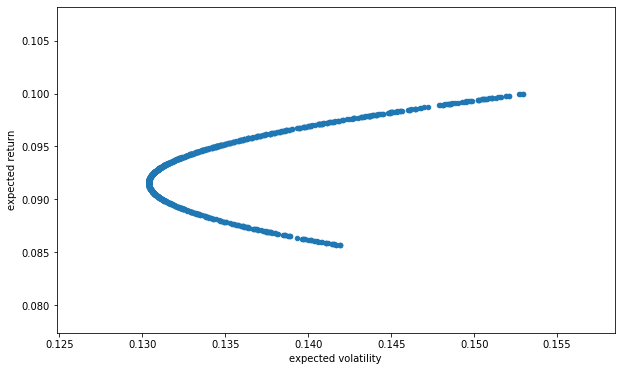

In [255]:
# Plot Efficient Frontier

portfolios.plot(x = 'Volatility', y = 'Return', kind = 'scatter', figsize = (10,6))
plt.xlabel('expected volatility')
plt.ylabel('expected return')

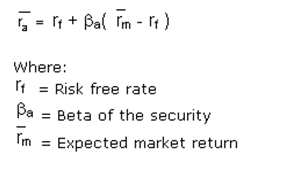

In [269]:
# Capital Asset Pricing Model

IPython.display.Image("https://4.bp.blogspot.com/-1ODGaqxz5cA/WQ7y1Ae9tqI/AAAAAAAAL7E/rG0CbxxebEo2FoQoMhi04jtPH6dP-dZywCLcB/s400/Capture.PNG")

In [265]:
# Calculating beta

tickers = ['PG', '^GSPC']
data = pd.DataFrame()

for t in tickers:
    data[t] = wb.DataReader(t, data_source = 'yahoo', start = '2012-1-1', end = '2016-12-31')['Adj Close']
    
sec_returns = np.log(data / data.shift(1)) #iloc used for normalization
cov = sec_returns.cov() * 250
cov_with_market = cov.iloc[0, 1]
market_var = sec_returns['^GSPC'].var() * 250

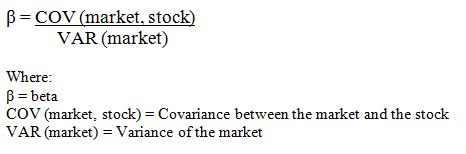

In [258]:
IPython.display.Image("https://financialmodeltraining.s3.amazonaws.com/beta1.jpg")

In [267]:
PG_beta = cov_with_market / market_var
PG_beta

# PG is a defensive stock.

0.6159579065079841

In [270]:
PG_er = 0.025 + PG_beta * 0.05
PG_er

0.05579789532539921

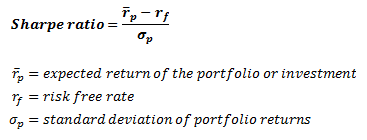

In [273]:
# Sharpe Ratio

IPython.display.Image("https://www.macroption.com/images/formulas/sharpe-ratio-formula-explained.png")

In [271]:
sharpe = (PG_er - 0.025) / (sec_returns['PG'].std() * 250 ** 0.5)
sharpe

0.215580200310202

In [286]:
# Multivariate Regression

X = housing_indices[['mortgage interest rates',
                    'House Construction Cost Index',
                    'Consumer Prices']]

Y = housing_indices['Private new house prices']

In [287]:
X1 = sm.add_constant(X)
reg = sm.OLS(Y, X1).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     Private new house prices   R-squared:                       0.892
Model:                                  OLS   Adj. R-squared:                  0.877
Method:                       Least Squares   F-statistic:                     60.56
Date:                      Sun, 08 Nov 2020   Prob (F-statistic):           8.57e-11
Time:                              17:41:33   Log-Likelihood:                -133.67
No. Observations:                        26   AIC:                             275.3
Df Residuals:                            22   BIC:                             280.4
Df Model:                                 3                                         
Covariance Type:                  nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                           -63.9268    138.917     -0.460      0.650    -352.023     224.169
mortgage interest rates          -0.2594      0.766     -0.339      0.738      -1.847       1.329
House Construction Cost Index     4.1789      1.805      2.315      0.030       0.435       7.922
Consumer Prices                  -2.3059      2.790     -0.827      0.417      -8.092       3.480
==============================================================================
Omnibus:                        1.315   Durbin-Watson:                   0.556
Prob(Omnibus):                  0.518   Jarque-Bera (JB):                0.798
Skew:                           0.429   Prob(JB):                        0.671
Kurtosis:                       2.954   Cond. No.                     3.49e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.49e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [289]:
# Monte Carlo Simulations

rev_m = 170
rev_stdev = 20
iterations = 1000

rev = np.random.normal(rev_m, rev_stdev, iterations)
rev

array([147.10475014, 173.23279459, 189.39773179, 135.37645296,
       175.86742937, 147.34690517, 146.89905947, 134.79780345,
       167.28918532, 190.24266925, 206.29662287, 199.66746205,
       177.43373589, 159.78125659, 189.68367071, 194.07502515,
       158.59519036, 175.93945265, 169.72588107, 205.03847985,
       175.49311927, 167.56618588, 177.00121065, 142.32254135,
       139.28451924, 137.46396798, 157.13168415, 160.39395285,
       171.11899254, 176.91764202, 190.96739011, 147.83935973,
       178.0497395 , 150.37585378, 169.77438995, 159.69319262,
       184.55925362, 195.21129688, 172.48500102, 146.72016351,
       193.31836826, 160.66188621, 166.32553539, 198.10536405,
       161.78609369, 168.03977902, 143.48505477, 178.65937572,
       196.43409478, 166.74280405, 155.17419414, 175.54583364,
       189.95290748, 162.87738242, 201.58308671, 144.2815396 ,
       139.15086634, 176.1464777 , 210.909478  , 156.82821806,
       150.80921175, 135.96741922, 184.90358296, 180.84

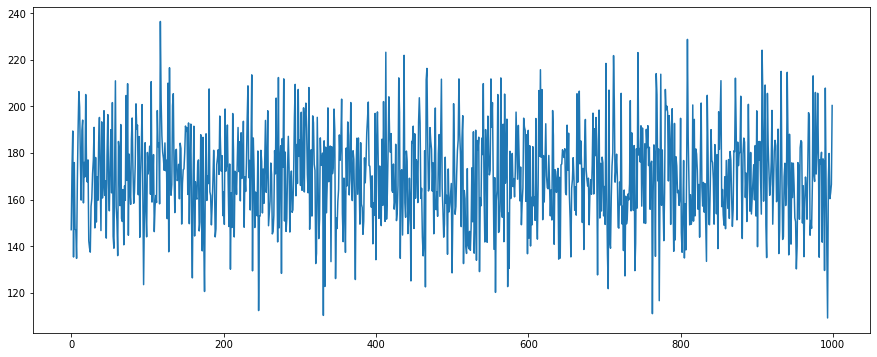

In [290]:
plt.figure(figsize = (15,6))
plt.plot(rev)
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

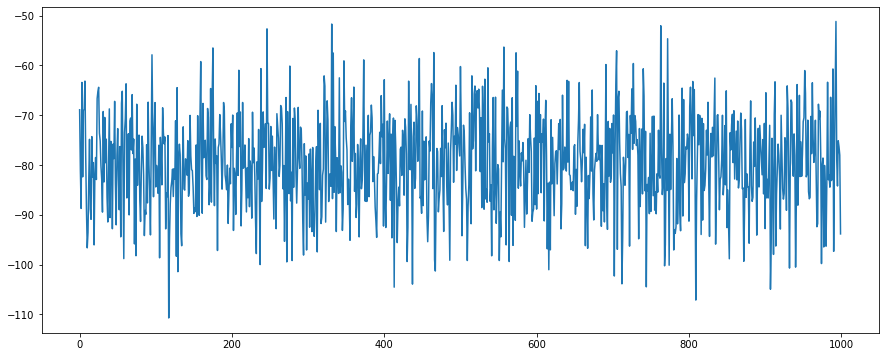

In [291]:
cogs = -(rev* np.random.normal(0.6, 0.1)) # 60% is an approximatio of the company's cogs, with a std of 10%

plt.figure(figsize = (15,6))
plt.plot(cogs)
plt.show

In [292]:
cogs.mean()

-79.62151934540707

In [293]:
cogs.std()

9.636365511361157

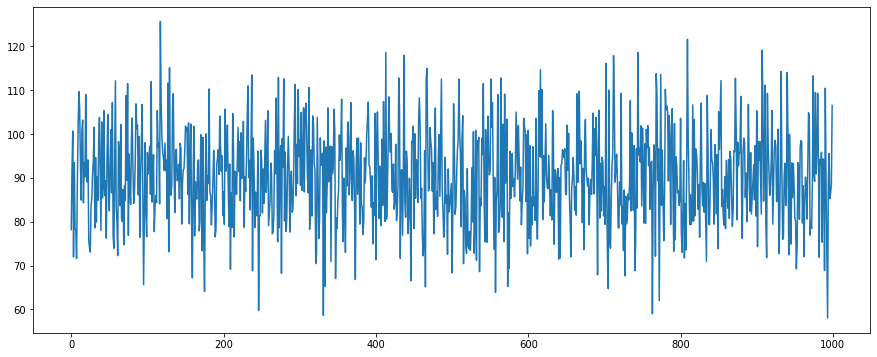

In [294]:
gross_profit = rev + cogs
plt.figure(figsize = (15, 6))
plt.plot(gross_profit)
plt.show()

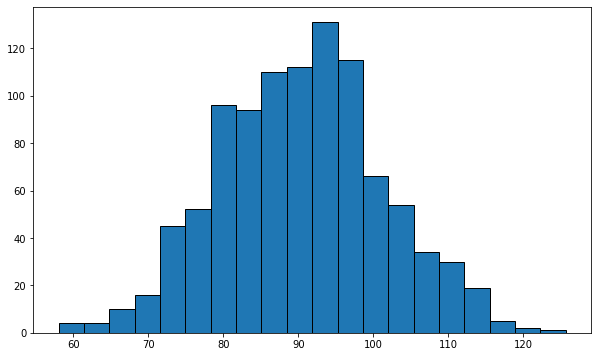

In [298]:
plt.figure(figsize = (10,6))
plt.hist(gross_profit, bins = 20)
plt.show()

In [300]:
# Brownian motion (predicting stock prices)

from scipy.stats import norm
ticker = 'PG'
data = pd.DataFrame()
data[ticker] = wb.DataReader(ticker, data_source = 'yahoo', start = '2007-1-1', end = '2017-4-10')['Adj Close']

In [302]:
log_returns = np.log(1 + data.pct_change())
log_returns.tail()

,PG
Date,
2017-04-04,0.002561
2017-04-05,0.000667
2017-04-06,-0.006356
2017-04-07,-0.001903
2017-04-10,0.002910


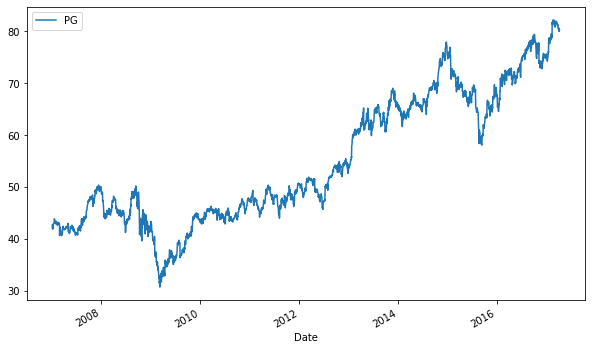

In [303]:
data.plot(figsize = (10,6))

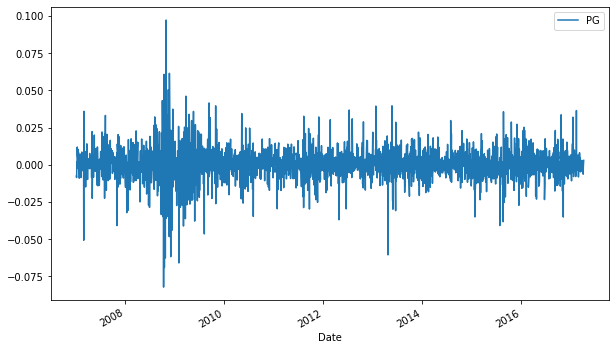

In [304]:
log_returns.plot(figsize = (10,6))

In [305]:
u = log_returns.mean()
u

PG    0.000244
dtype: float64

In [306]:
var = log_returns.var()
var

PG    0.000124
dtype: float64

In [307]:
# Where drift = average log return - half of the stock's variance

drift = u - (0.5*var)
drift

PG    0.000182
dtype: float64

In [308]:
stdev = log_returns.std()
stdev

PG    0.011138
dtype: float64

In [310]:
# r = drift + stdev * e^r

np.array(drift)
norm.ppf(0.95)

x = np.random.rand(10, 2)
norm.ppf(x)

array([[-2.99689547, -0.46230857],
       [ 0.14964382, -0.67818466],
       [ 0.72729428, -0.05301624],
       [-0.61990162, -0.66584386],
       [ 0.23571592,  0.21916494],
       [ 0.43824714, -0.98335358],
       [-0.08914319, -0.05900855],
       [-1.26619146, -1.39205328],
       [-0.35204048,  1.25286347],
       [-0.85062557,  0.33703176]])

In [311]:
z = norm.ppf(np.random.rand(10, 2))
z

array([[ 0.2886905 , -0.8828562 ],
       [-0.28004956, -0.20378752],
       [ 0.39038855, -0.05233408],
       [-0.77618539,  0.7789598 ],
       [-0.18141305,  0.5536525 ],
       [-1.41592685, -0.44460107],
       [ 0.37411453, -0.19984553],
       [-0.00177574, -0.33107346],
       [-0.45844879, -0.4160915 ],
       [ 1.56435265,  0.35815365]])

In [313]:
t_intervals = 1000
iterations = 10

daily_returns = np.exp(drift.values + stdev.values * norm.ppf(np.random.rand(t_intervals, iterations)))
daily_returns

array([[0.99887997, 1.00834566, 0.9929589 , ..., 1.0014865 , 1.02230142,
        1.0182087 ],
       [1.00259759, 1.00530195, 0.99477305, ..., 1.00219104, 1.00987551,
        1.00536487],
       [0.99681879, 0.98138624, 1.00167316, ..., 0.99947988, 0.99410776,
        0.99373028],
       ...,
       [0.9801123 , 0.99682697, 1.00144511, ..., 0.98822329, 0.99044852,
        0.99987395],
       [1.00549399, 1.00626966, 1.00186119, ..., 0.99015475, 0.99395055,
        0.98299147],
       [1.01334403, 0.98648075, 1.01445764, ..., 0.99151761, 1.00439979,
        0.99220216]])

In [314]:
s0 = data.iloc[-1]
s0

PG    80.194664
Name: 2017-04-10 00:00:00, dtype: float64

In [315]:
price_list = np.zeros_like(daily_returns)
price_list

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [316]:
price_list[0] = s0
price_list

array([[80.194664, 80.194664, 80.194664, ..., 80.194664, 80.194664,
        80.194664],
       [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
         0.      ],
       [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
         0.      ],
       ...,
       [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
         0.      ],
       [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
         0.      ],
       [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
         0.      ]])

In [319]:
for t in range (1, t_intervals):
    price_list[t] = price_list[t - 1] * daily_returns[t]

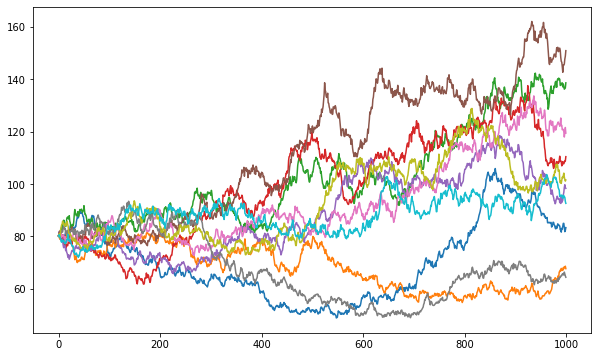

In [322]:
plt.figure(figsize = (10,6))
plt.plot(price_list)

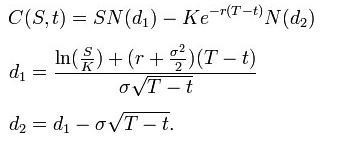

In [323]:
# Pricing Derivatives with the Black Scholes formula

IPython.display.Image("https://investing101.net/wp-content/uploads/2015/10/chapter9-8b1.jpg")

# Where
# s = stock price, k = strike price, r = risk free rate, stdev = standard deviation, t = time

In [340]:
from scipy.stats import norm

In [341]:
def d1(S, k, r, stdev, T):
    return (np.log(S/K) + (r + stdev **2/2)*T) / (stdev * np.sqrt(T))

def d2(S, k, r, stdev, T):
    return (np.log(S/K) + (r - stdev **2/2)*T) / (stdev * np.sqrt(T))

In [342]:
def BSM(S, K, r, stdev, T):
    return (S * norm.cdf(d1(S, K, r, stdev, T))) - (K * np.exp(-r * T) * norm.cdf(d2(S, K, r, stdev, T)))

In [343]:
S = data.iloc[-1]
S

PG    80.194664
Name: 2017-04-10 00:00:00, dtype: float64

In [344]:
log_returns = np.log(1 + data.pct_change())
stdev = log_returns.std() * 250 ** 0.5

In [346]:
r = 0.025
K = 110.0
T = 1

print(d1(S, K, r, stdev, T))
print(d2(S, K, r, stdev, T))

PG   -1.564465
dtype: float64
PG   -1.740574
dtype: float64


In [347]:
# Price of the derivative

print(BSM(S, K, r, stdev, T))

PG    0.334111
Name: 2017-04-10 00:00:00, dtype: float64


In [373]:
# Euler Discretization
# stdev = stdev.values

T = 1
t_intervals = 250
delta_t = T / t_intervals
iterations = 1000

Z = np.random.standard_normal((t_intervals + 1, iterations))
S = np.zeros_like(Z)
s0 = data.iloc[-1]
s[0] = s0

In [374]:
for t in range(1, t_intervals + 1):
    S[t] = S[t-1] * np.exp((r - 0.5 * stdev ** 2) * delta_t + stdev * delta_t ** 0.5 * Z[t])

In [375]:
S

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

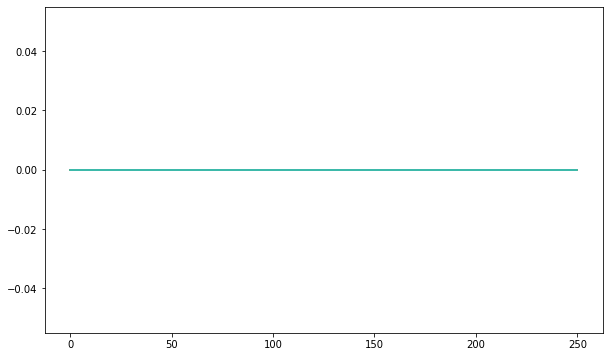

In [368]:
plt.figure(figsize=(10,6))
plt.plot(S[:, :10]);

# This is wrong but I'll fix it later